# Predição do Preço de Criptomoedas - Inferências Estatísticas Preliminares

**INTRODUÇÃO**

Criptomoedas apresentam grande volatilidade, apresentando grande variação de preços em períodos curtos de tempo.
Devido a sua instabilidade, hipotetizo que o uso de análises clássicas de séries temporais (com apenas o histórico do preço) não é a melhor forma de predizer o preço futuro da moeda.
Serão usados dados adicionais para as correlações com as criptomoedas escolhidas, com o objetivo de uma melhor predição de preços futuros. Os dados adicionais preliminares serão notícias do GoogleNews.
Os clientes em potencial seriam investidores em geral, interessados em compras de criptomoedas.
Os clientes poderiam prever o aumento/diminuição dos preços com o modelo e, hipoteticamente, lucrar com a compra e venda de moedas.

Perguntas preliminares:

- O aumento ou queda na frequência de pesquisa das palavras "cryptocurrency", "bitcoin" ou "ethereum" no GoogleNews implica um sinal de negociação?
- Existe alguma correlação óbvia entre os diferentes preços de mercado das criptomoedas?
- Se a correlação entre as moedas A e B existe, podemos usar o histórico de preços da moeda A para prever o preço futuro da moeda B? Será mais útil do que usar apenas os preços históricos da moeda B sozinha?

**DADOS** 

Criptomoedas: dados financeiros de moedas populares disponíveis na API Yahoo Finance, como Bitcoin e Ethereum. 
A popularidade da moeda é importante neste caso, já que queremos ver a sua relação com a presença na mídia.
Mídia: a API não oficial do Google Trends (número total de buscas) e uma API de notícias dos principais meios de comunicação publicados online, como o MediaStack.
O objetivo é testar a correlação de cada moeda com palavras chave, como o nome da própria moeda.
Os links para as APIs estão abaixo.

**METODOLOGIA**
1. Obtenção dos dados.
2. Identificação de correlações positivas ou negativas e seleção das melhores palavras chave.
3. Proposta de um modelo de predição.
4. Produção de uma ferramenta de consulta (?).

O código a seguir consulta, visualiza e testa dados para explorar as questões preliminares. A meta aqui é obter dados para análises futuras.

In [1]:
import requests
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler

#dados
import yfinance as yf
from pytrends.request import TrendReq

#gráficos
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Obtendo dados das criptomoedas

Primeiro passo é a obtenção dos dados. Vamos utilizar a API do Yahoo Finance e capturar os dados dos últimos 4 anos do Bitcoin e do Ethereum 

Moedas: dados vem do https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch

Útil: https://algotrading101.com/learn/yfinance-guide/

In [2]:
# obtendo dados do Bitcoin dos últimos 4 anos com intevalo de 1 dia
data = yf.download(tickers='BTC-USD', period = '4y', interval = '1d')

#para esta análise exploratória, vou utilizar apenas os preços de fechamento
dataBTC = pd.DataFrame(data['Close'])


dataBTC.head(10)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2017-07-13,2357.899902
2017-07-14,2233.340088
2017-07-15,1998.859985
2017-07-16,1929.819946
2017-07-17,2228.409912
2017-07-18,2318.879883
2017-07-19,2273.429932
2017-07-20,2817.600098
2017-07-21,2667.760010


In [3]:
#parâmetros globais para os gráficos
rcParams['figure.figsize'] = 16,9

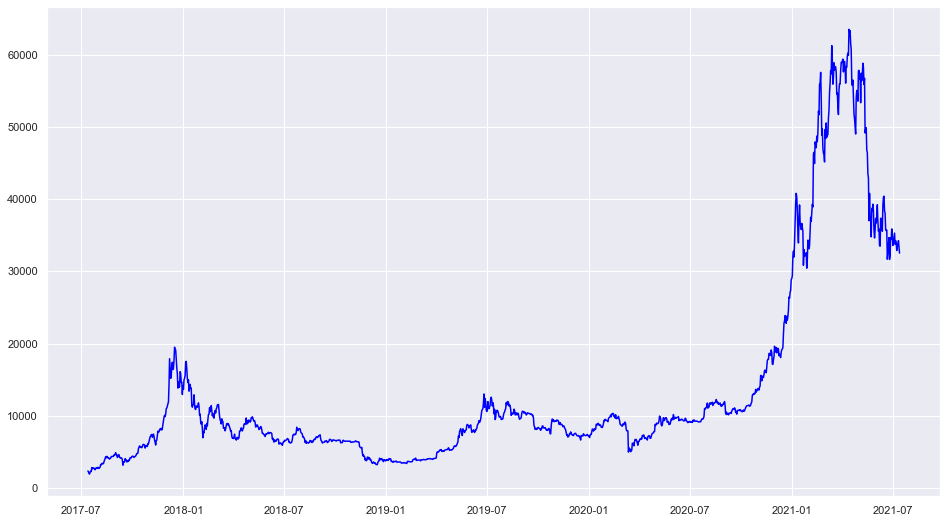

In [7]:
#visualizando os dados de bitcoin obtidos
sns.set()
plt.plot(dataBTC.index, dataBTC.Close, color='blue')
plt.savefig('dataBTC.png', dpi=300)
plt.show()

In [9]:
# mesmo código, agora obtendo dados do Ethereum
data = yf.download(tickers='ETH-USD', period = '4y', interval = '1d')
dataETH = pd.DataFrame(data['Close'])
dataETH.head(10)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2017-07-13,209.733002
2017-07-14,199.662003
2017-07-15,170.654999
2017-07-16,157.363007
2017-07-17,193.423996
2017-07-18,234.391006
2017-07-19,199.703003
2017-07-20,227.264999
2017-07-21,218.304993


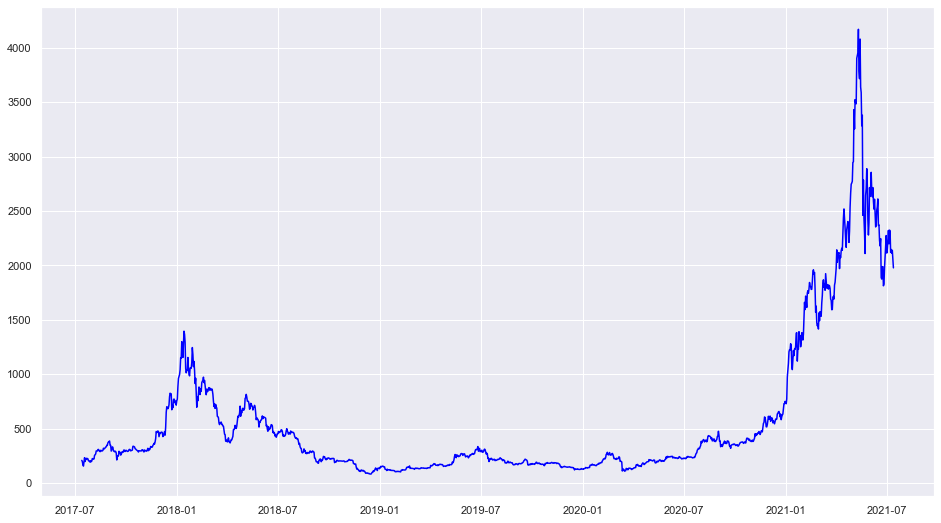

In [10]:
#visualizando os dados obtidos
sns.set()
plt.plot(dataETH.index, dataETH.Close, color='blue')
plt.savefig('dataETH.png', dpi=300)
plt.show()

# Obtendo dados de notícias

Agora vamos obter os dados de notícias usando a API Pytrends que captura dados do Google Trends https://github.com/GeneralMills/pytrends/blob/master/README.md#api-methods

In [11]:
#palavra chave: 'cryptocurrency'

pytrend = TrendReq()
# Criar um payload para capturar a API. Necessário para obter interest_over_time(), interest_by_region() & related_queries()
# keyword = 'cryptocurrency', cathegory = 16 (notícias), timeframe- últimos 4 anos
pytrend.build_payload(kw_list=['cryptocurrency'], cat=16, timeframe='2017-06-02 2021-05-31')  
crypto_ggtrends = pytrend.interest_over_time()

# removendo a coluna isPartial (boolean)
crypto_ggtrends = crypto_ggtrends.pad().drop(['isPartial'], axis='columns')

# substituindo o nome da coluna
crypto_ggtrends.columns = ['Cryptocurrency']

crypto_ggtrends.head(10)

,Cryptocurrency
date,
2017-06-04,5
2017-06-11,6
2017-06-18,6
2017-06-25,6
2017-07-02,4
2017-07-09,6
2017-07-16,5
2017-07-23,4
2017-07-30,5


In [12]:
#palavra chave: 'bitcoin'
pytrend = TrendReq()
pytrend.build_payload(kw_list=['bitcoin'], cat=16, timeframe='2017-06-02 2021-05-31')  
bit_ggtrends = pytrend.interest_over_time()
bit_ggtrends = bit_ggtrends.pad().drop(['isPartial'], axis='columns')
bit_ggtrends.columns = ['Bitcoin']
bit_ggtrends.head()

,Bitcoin
date,
2017-06-04,10
2017-06-11,9
2017-06-18,8
2017-06-25,7
2017-07-02,6


In [13]:
#palavra chave: 'ethereum'
pytrend = TrendReq()
pytrend.build_payload(kw_list=['ethereum'], cat=16, timeframe='2017-06-02 2021-05-31')  
eth_ggtrends = pytrend.interest_over_time()
eth_ggtrends = eth_ggtrends.pad().drop(['isPartial'], axis='columns')
eth_ggtrends.columns = ['Ethereum']
eth_ggtrends.head()

,Ethereum
date,
2017-06-04,7
2017-06-11,20
2017-06-18,11
2017-06-25,12
2017-07-02,5


## Combinando os dataframes

In [14]:
# preço Bitcoin + preço Ethereum + palavra-chave 'crytocurrency'

data_cripto = pd.concat([dataBTC, dataETH, crypto_ggtrends], axis=1).dropna(how='any')
data_cripto.columns = ['BTC', 'ETH', 'SearchFrequency']
data_cripto.head()

,BTC,ETH,SearchFrequency
2017-07-16,1929.819946,157.363007,5.0
2017-07-23,2730.399902,225.951004,4.0
2017-07-30,2757.179932,197.977997,5.0
2017-08-06,3213.939941,261.566986,6.0
2017-08-13,4073.260010,298.063995,6.0


In [15]:
# preço Bitcoin + palavra-chave 'bitcoin'

story_combined = pd.concat([dataBTC, bit_ggtrends], axis=1).dropna(how='any')
bitcoin_combined = story_combined.copy(deep=True)
bitcoin_combined.head()

,Close,Bitcoin
2017-07-16,1929.819946,9.0
2017-07-23,2730.399902,8.0
2017-07-30,2757.179932,12.0
2017-08-06,3213.939941,10.0
2017-08-13,4073.260010,16.0


In [16]:
# preço Ethereum + palavra-chave 'ethereum'

story_combined = pd.concat([dataETH, eth_ggtrends], axis=1).dropna(how='any')
ethereum_combined = story_combined.copy(deep=True)
ethereum_combined.head()

,Close,Ethereum
2017-07-16,157.363007,10.0
2017-07-23,225.951004,7.0
2017-07-30,197.977997,5.0
2017-08-06,261.566986,7.0
2017-08-13,298.063995,6.0


## Standardazing

A padronização ("standardazing" em inglês, também chamada de normalização Z-score) é uma técnica de escalonamento que quando aplicada, os recursos serão redimensionados para que tenham as propriedades de uma distribuição normal padrão com média μ = 0 e desvio padrão σ = 1; onde μ é a média (média) e σ é o desvio padrão da média.

Isso dimensiona os recursos de uma forma que eles variam entre [-1,1], permitindo a comparação entre dados com escalas diferentes. 

In [17]:
sc_x = StandardScaler()

#Bitcoin + Ethereum
data_cripto['BTC'] = sc_x.fit_transform(data_cripto['BTC'].values.reshape(-1,1))
data_cripto['ETH'] = sc_x.fit_transform(data_cripto['ETH'].values.reshape(-1,1))
data_cripto['SearchFrequency'] = sc_x.fit_transform(data_cripto['SearchFrequency'].values.reshape(-1,1))

#Bitcoin
bitcoin_combined['Close'] = sc_x.fit_transform(bitcoin_combined['Close'].values.reshape(-1,1))
bitcoin_combined['Bitcoin'] = sc_x.fit_transform(bitcoin_combined['Bitcoin'].values.reshape(-1,1))

#Ethereum
ethereum_combined['Close'] = sc_x.fit_transform(ethereum_combined['Close'].values.reshape(-1,1))
ethereum_combined['Ethereum'] = sc_x.fit_transform(ethereum_combined['Ethereum'].values.reshape(-1,1))

## Visualizando os resultados

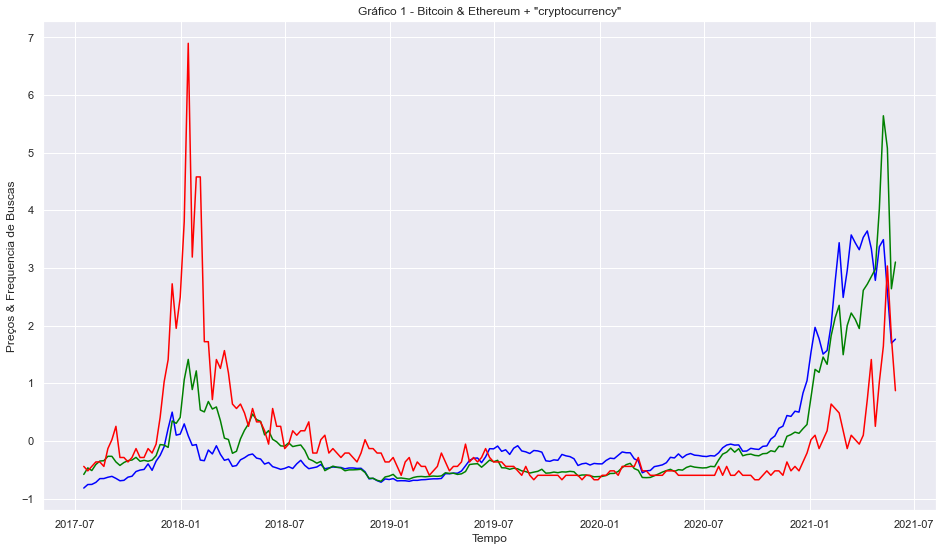

In [19]:
# preço Bitcoin + preço Ethereum + palavra-chave 'crytocurrency'
sns.set()
plt.plot(data_cripto.index, data_cripto['BTC'], color='blue')
plt.plot(data_cripto.index, data_cripto['ETH'], color='green')
plt.plot(data_cripto.index, data_cripto['SearchFrequency'], color='red')

plt.xlabel('Tempo')
plt.ylabel('Preços & Frequencia de Buscas')
plt.title('Gráfico 1 - Bitcoin & Ethereum + "cryptocurrency"')
plt.savefig('BTC_ETH_cryp_STD.png', dpi=300)
plt.show()

No gráfico 1 podemos ver:

- A linha vermelha representa a palavra "cryptocurrency", a linha azul representa o valor do Bitcoin e a linha verde representa o valor do Ethereum.
- Até Julho de 2020, o número de menções da palavra chave "cryptocurrency" acompanhava a subida e a descida das duas moedas.
- O gráfico mostra que a palavra "cryptocurrency" caiu em desuso à partir de Julho de 2020 e provavelmente foi substituída pelo nome de cada moeda.

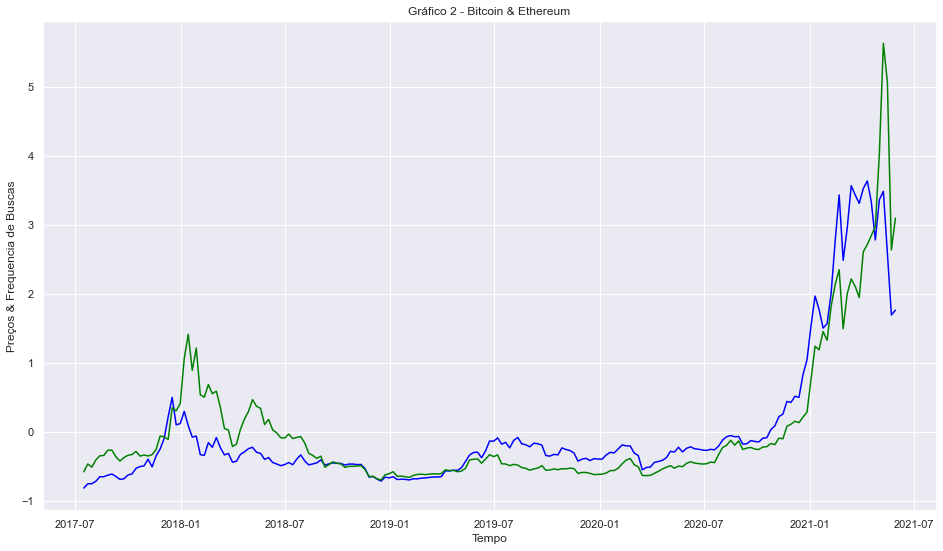

In [20]:
# mesmo gráfico anterior, sem a palavra chave
sns.set()
plt.plot(data_cripto.index, data_cripto['BTC'], color='blue')
plt.plot(data_cripto.index, data_cripto['ETH'], color='green')

plt.xlabel('Tempo')
plt.ylabel('Preços & Frequencia de Buscas')
plt.title('Gráfico 2 - Bitcoin & Ethereum')
plt.savefig('BTC_ETH_STD.png', dpi=300)
plt.show()

No gráfico 2 podemos ver:

- Parece haver uma correlação entre os preços ETH e BTC. Os preços das duas moedas sobem e descem juntos. Será realizado o Teste de Causalidade de Granger para confirmar a relação. 
- Não há tendência óbvia (variação média ao longo do tempo) ou sazonalidade (variação variável ao longo do tempo) observada neste intervalo. No entanto, o teste de Dickey-Fuller será realizado para confirmar a estacionalidade da série.

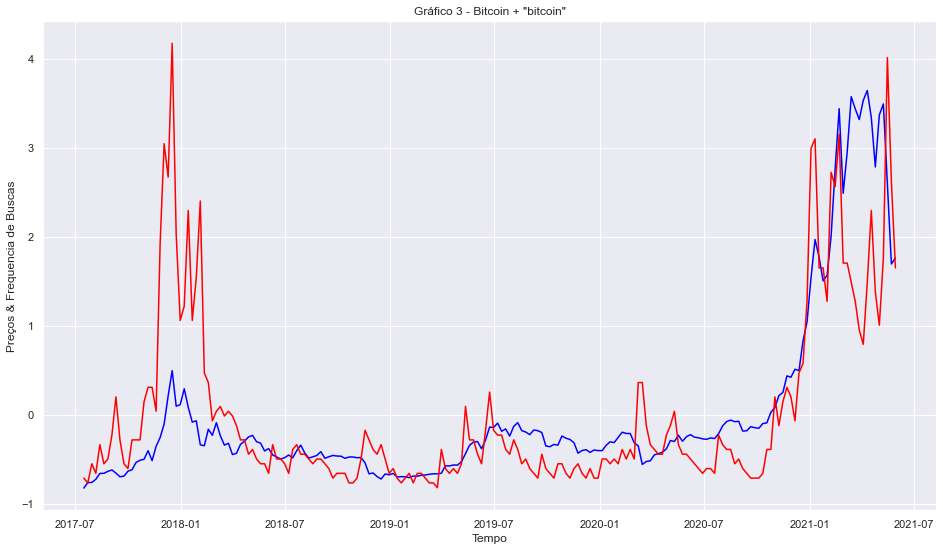

In [21]:
# preço Bitcoin + palavra-chave 'bitcoin'
sns.set()
plt.plot(bitcoin_combined.index, bitcoin_combined['Close'], color='blue')
plt.plot(bitcoin_combined.index, bitcoin_combined['Bitcoin'], color='red')

plt.xlabel('Tempo')
plt.ylabel('Preços & Frequencia de Buscas')
plt.title('Gráfico 3 - Bitcoin + "bitcoin"')
plt.savefig('BTC_btc_STD.png', dpi=300)
plt.show()

No gráfico 3 podemos ver:

- A frequência de notícias com a palavra chave "bitcoin" sobe muito quando o preço do Bitcoin sobe. Esse comportamento das notícias pode ser importante para a previsão do preço da moeda.

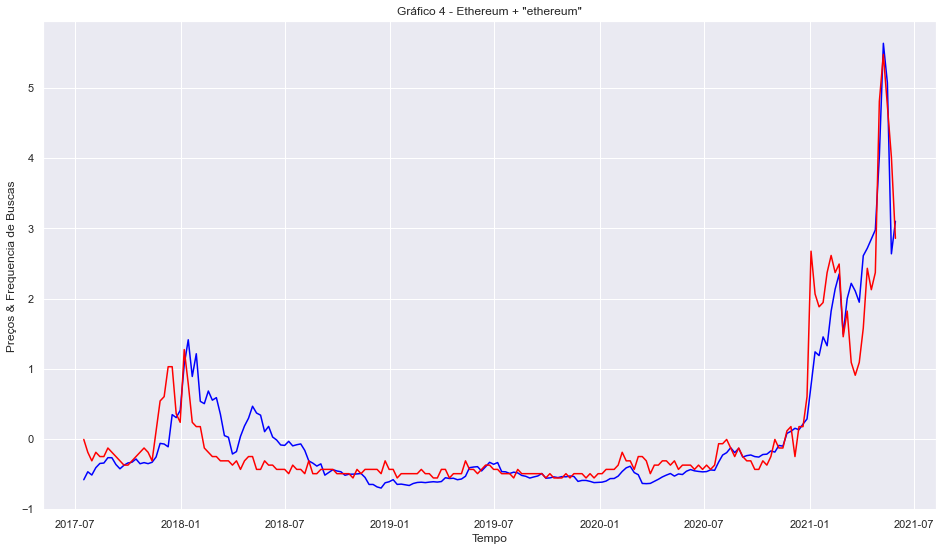

In [22]:
# preço Ethereum + palavra-chave 'ethereum'

sns.set()
plt.plot(ethereum_combined.index, ethereum_combined['Close'], color='blue')
plt.plot(ethereum_combined.index, ethereum_combined['Ethereum'], color='red')

plt.xlabel('Tempo')
plt.ylabel('Preços & Frequencia de Buscas')
plt.title('Gráfico 4 - Ethereum + "ethereum"')
plt.savefig('ETH_eth_STD.png', dpi=300)
plt.show()

No gráfico 4 podemos ver:

- A frequência de notícias com a palavra chave "ethereum" sobe quando o preço do Ethereum sobe, mas não na mesma proporção que vimos com o Bitcoin. 
- Mais recentemente (principalmente à partir de Janeiro de 2021), o relacionamento entre as notícias e a subida do valor parece ser mais óbvio.
- Vamos testar se esse correlação pode ajudar na previsão dos preços desta moeda.

## Conclusões

- A hipótese da popularidade da moeda parece ser mesmo importante para a correlação do seu preço e a sua menção na mídia. 
- Parece existir uma correlação de preços entre Bitcoin e Ethereum. Vamos testar se o preço de uma moeda se correlaciona com o preço da outra, podendo ser usado para a previsão.

## Próximos passos

- Próximos passos: testar a estacionalidade da série temporal e causalidade de Bitcoin vs Ethereum